## Import libraries and datasets

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from autoviz.classify_method import data_cleaning_suggestions
from sklearn import set_config; set_config(display='diagram')

In [5]:
train_challenge = pd.read_csv("data/train.csv")
train_original = pd.read_csv("data/train_original.csv")
test = pd.read_csv("data/test.csv")

In [18]:
train = pd.concat([train_challenge, train_original], ignore_index=True)

## EDA and Pre-processing

In [19]:
train = train.drop("id", axis=1)

In [20]:
print(train.duplicated().sum())
print(test.duplicated().sum())

5664
0


In [21]:
train = train.drop_duplicates()

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54573 entries, 0 to 60236
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          54573 non-null  int64  
 1   no_of_children                        54573 non-null  int64  
 2   no_of_weekend_nights                  54573 non-null  int64  
 3   no_of_week_nights                     54573 non-null  int64  
 4   type_of_meal_plan                     54573 non-null  int64  
 5   required_car_parking_space            54573 non-null  int64  
 6   room_type_reserved                    54573 non-null  int64  
 7   lead_time                             54573 non-null  int64  
 8   arrival_year                          54573 non-null  int64  
 9   arrival_month                         54573 non-null  int64  
 10  arrival_date                          54573 non-null  int64  
 11  market_segment_

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [29]:
data_cleaning_suggestions(train)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
avg_price_per_room,2834,float64,0,0.000000,5.193044,0,
lead_time,341,int64,0,0.000000,0.624851,0,
no_of_previous_bookings_not_canceled,47,int64,0,0.000000,0.086123,0,
arrival_date,31,int64,0,0.000000,0.056805,0,
no_of_week_nights,18,int64,0,0.000000,0.032983,0,
arrival_month,12,int64,0,0.000000,0.021989,0,
no_of_previous_cancellations,10,int64,0,0.000000,0.018324,0,
no_of_weekend_nights,8,int64,0,0.000000,0.014659,0,
room_type_reserved,7,int64,0,0.000000,0.012827,0,
no_of_special_requests,6,int64,0,0.000000,0.010994,0,


In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,54573.0,1.912631,0.526012,0.0,2.0,2.00,2.0,4.0
no_of_children,54573.0,0.141993,0.455300,0.0,0.0,0.00,0.0,9.0
no_of_weekend_nights,54573.0,0.882763,0.886632,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,54573.0,2.361094,1.454017,0.0,1.0,2.00,3.0,17.0
type_of_meal_plan,54573.0,0.243948,0.573955,0.0,0.0,0.00,0.0,3.0
required_car_parking_space,54573.0,0.029648,0.169617,0.0,0.0,0.00,0.0,1.0
room_type_reserved,54573.0,0.430249,0.840717,0.0,0.0,0.00,1.0,6.0
lead_time,54573.0,94.360838,79.931463,0.0,27.0,78.00,144.0,443.0
arrival_year,54573.0,2017.854250,0.352858,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,54573.0,7.531911,2.912821,1.0,5.0,8.00,10.0,12.0


In [26]:
train.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


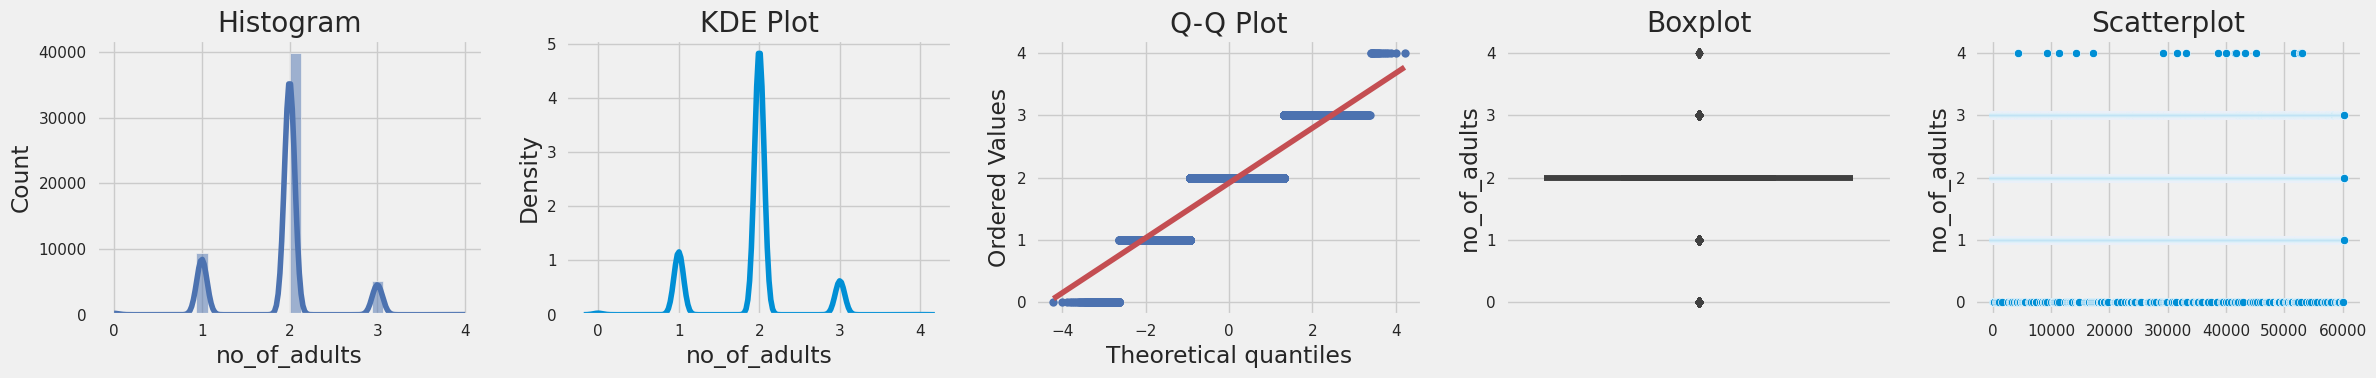

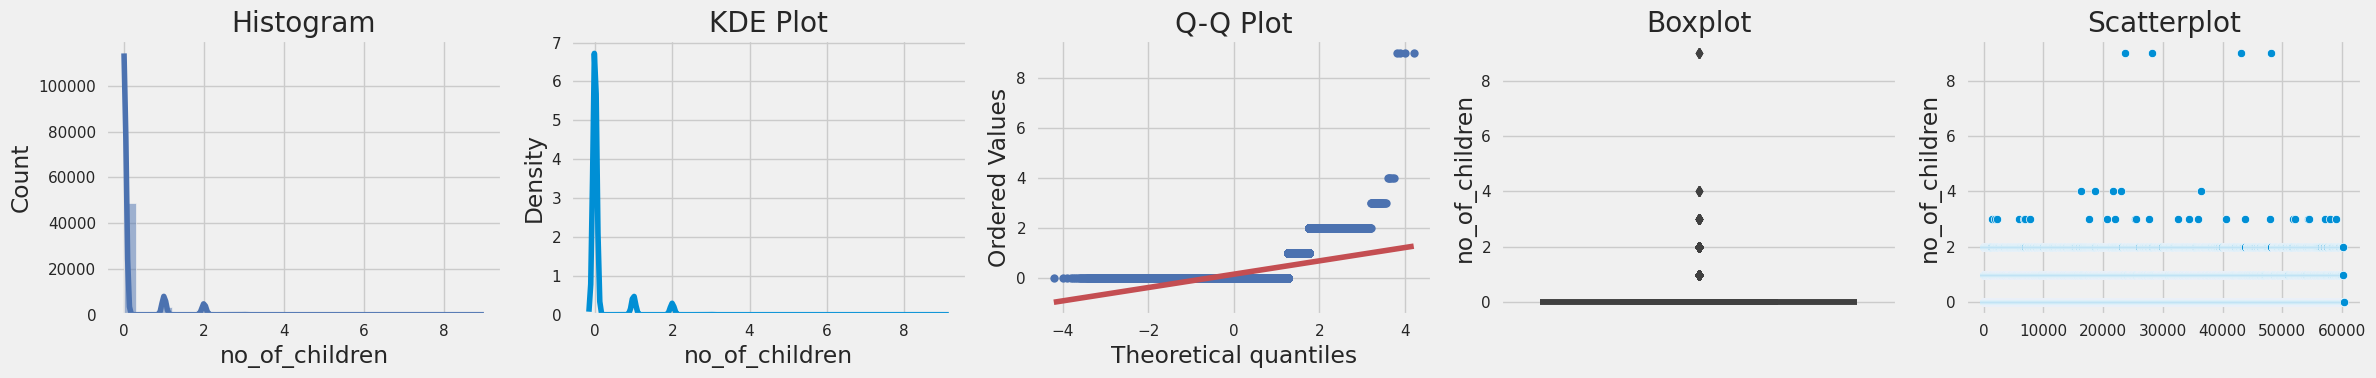

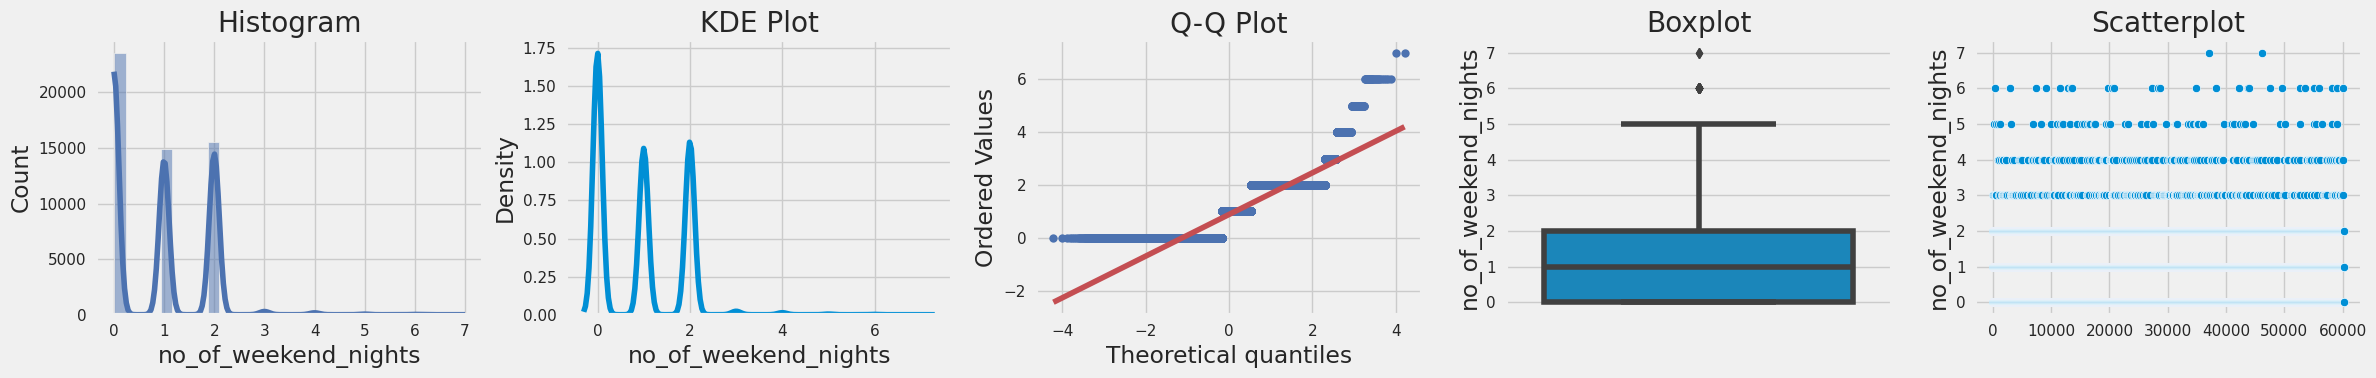

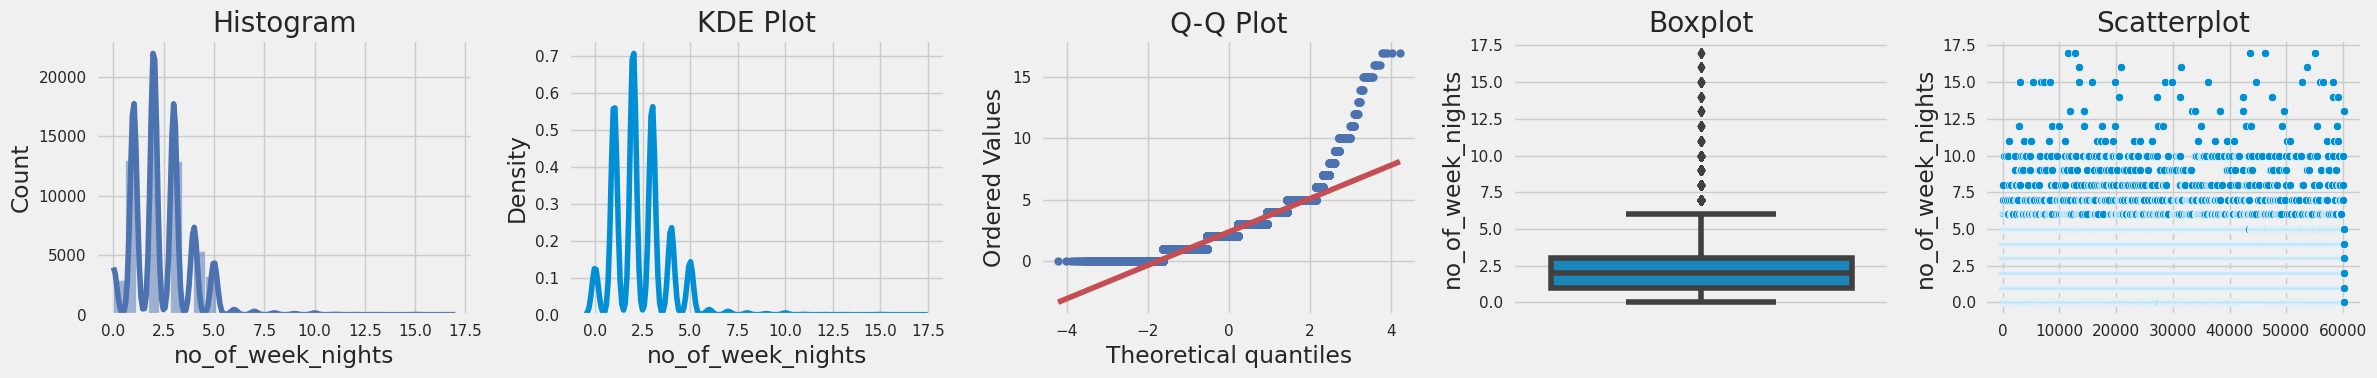

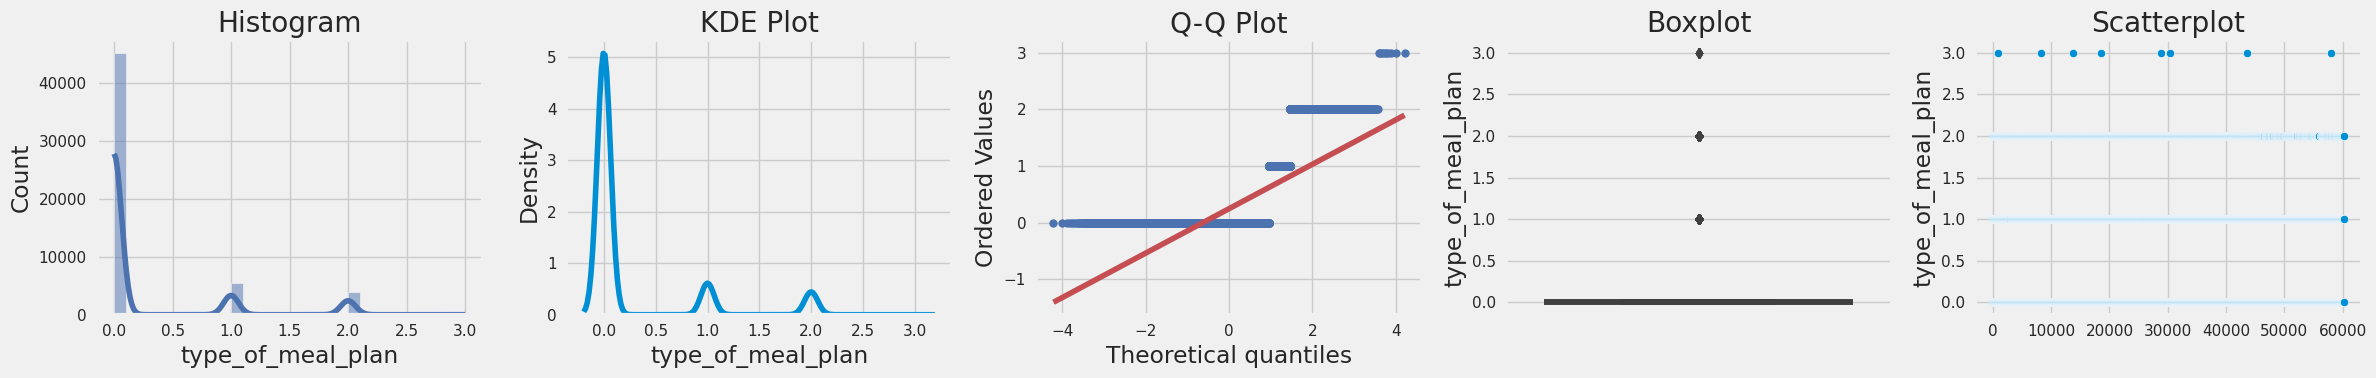

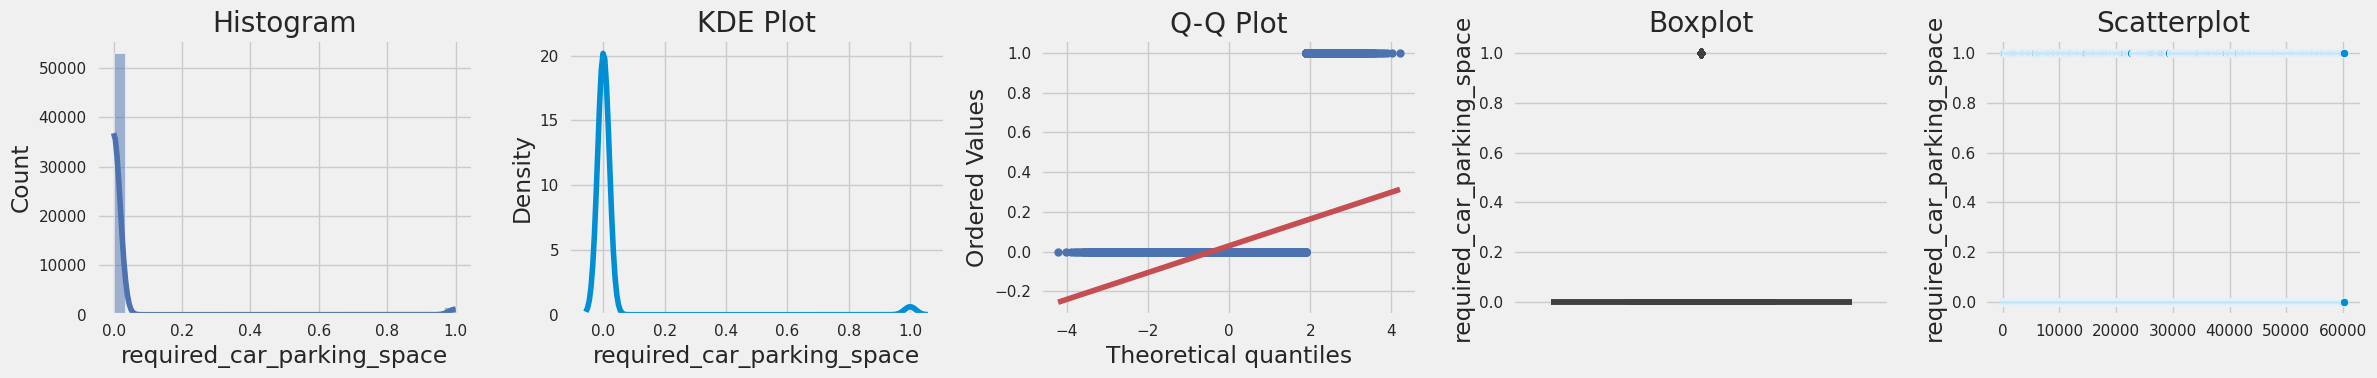

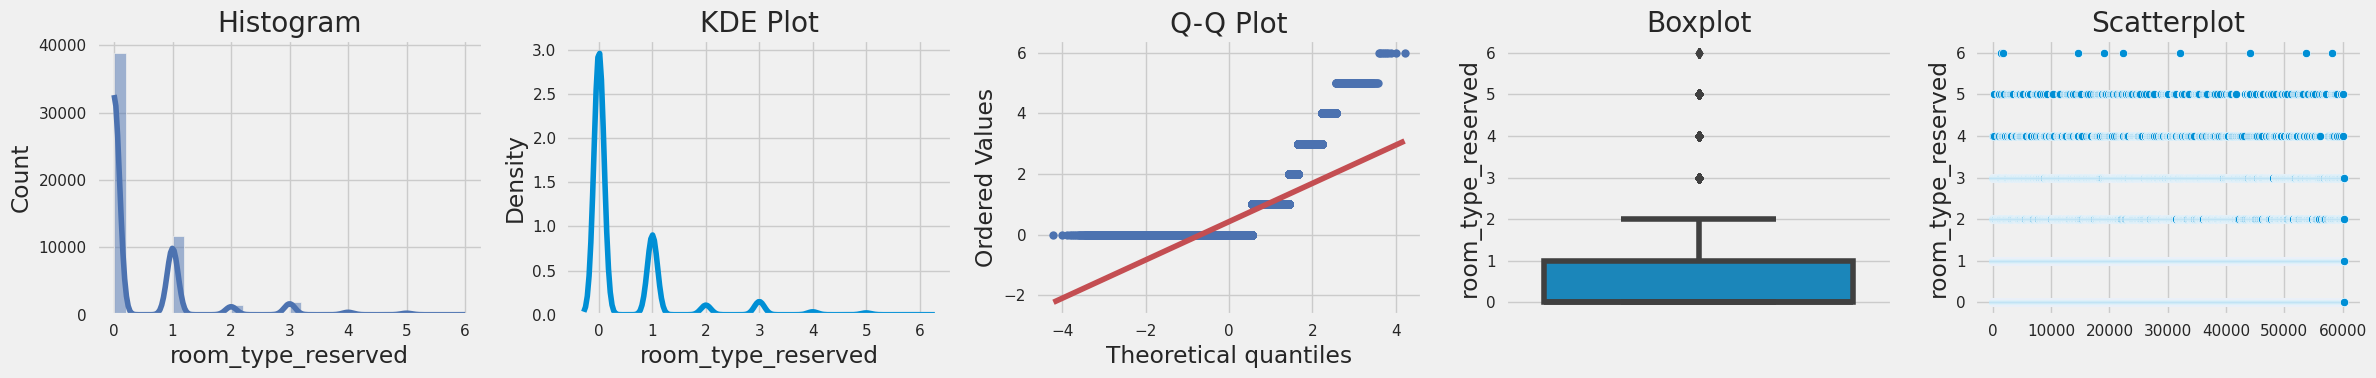

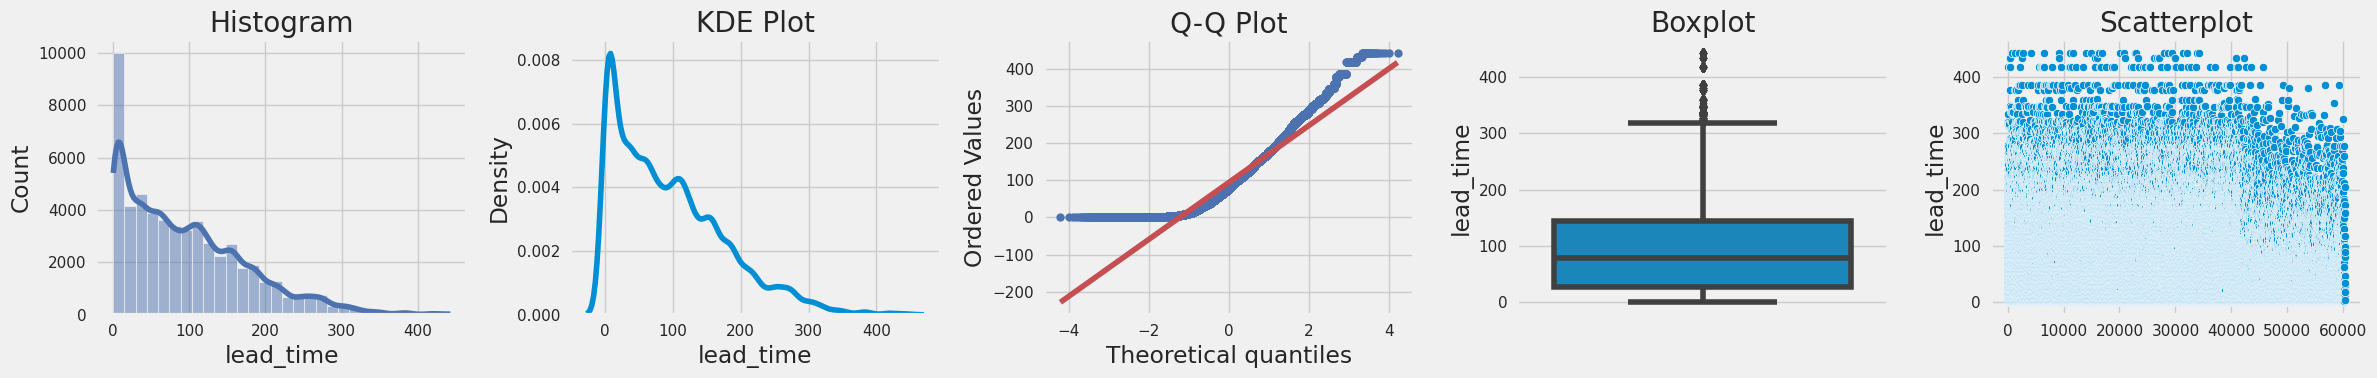

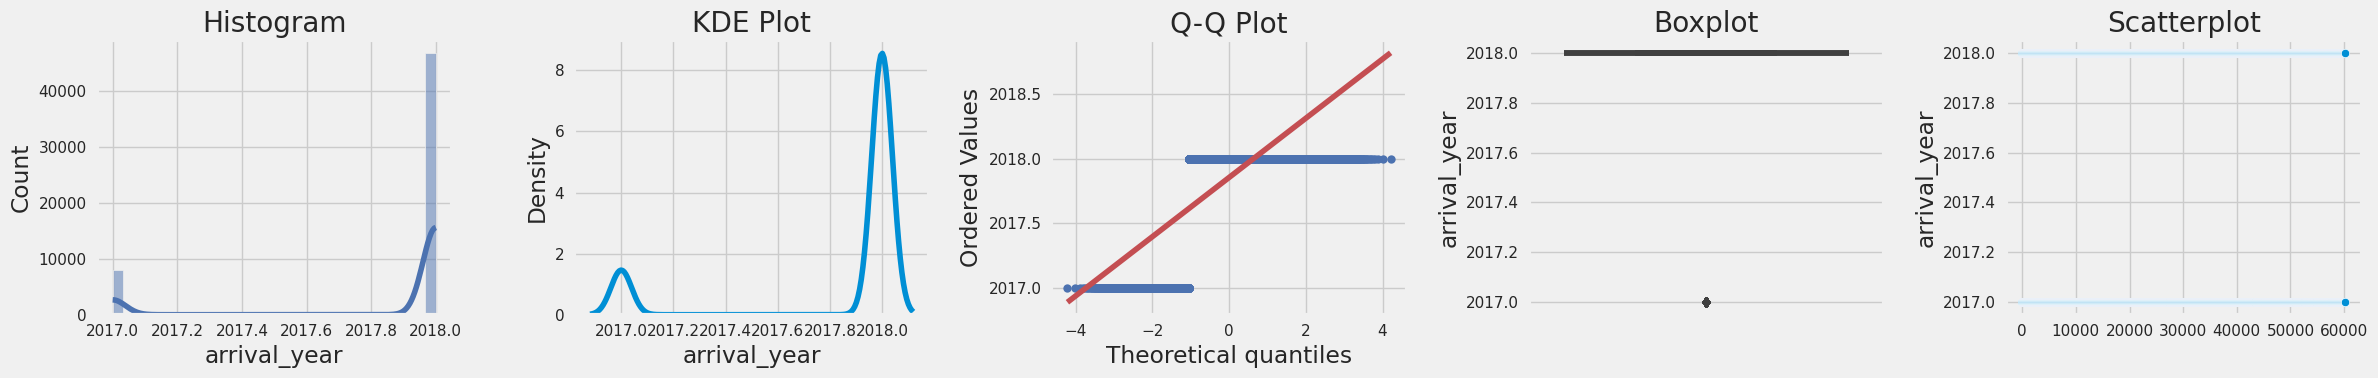

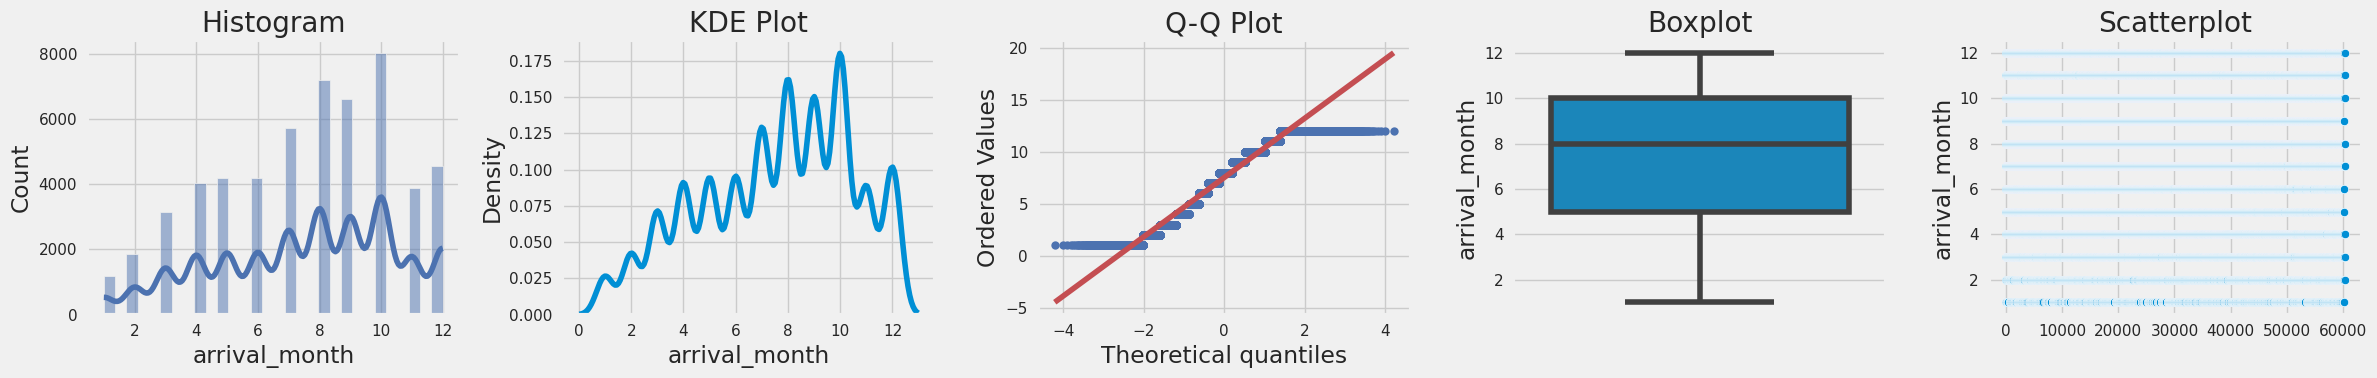

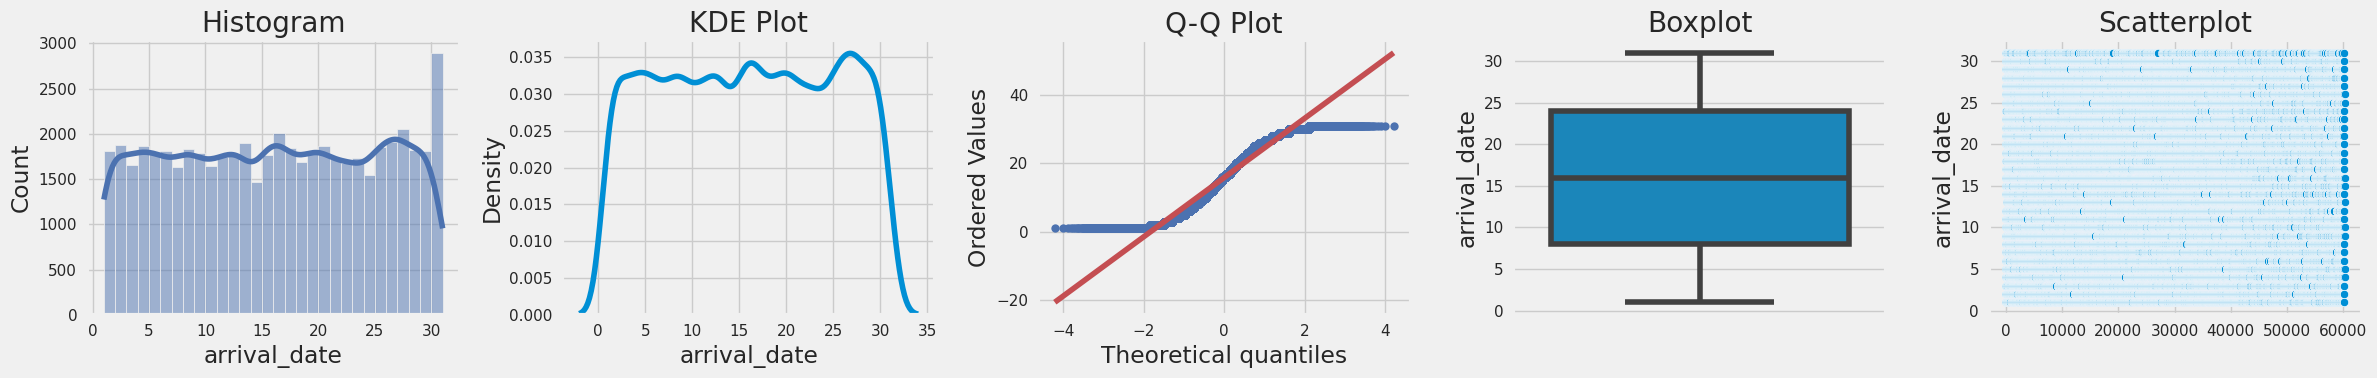

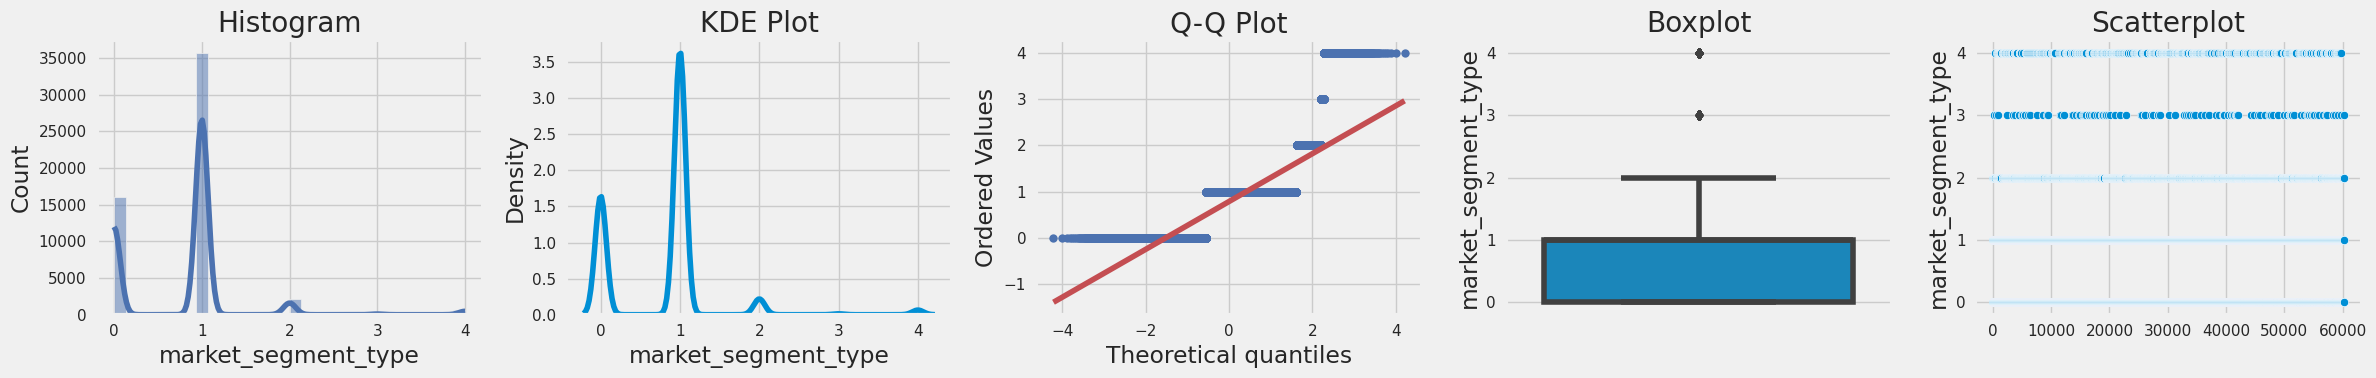

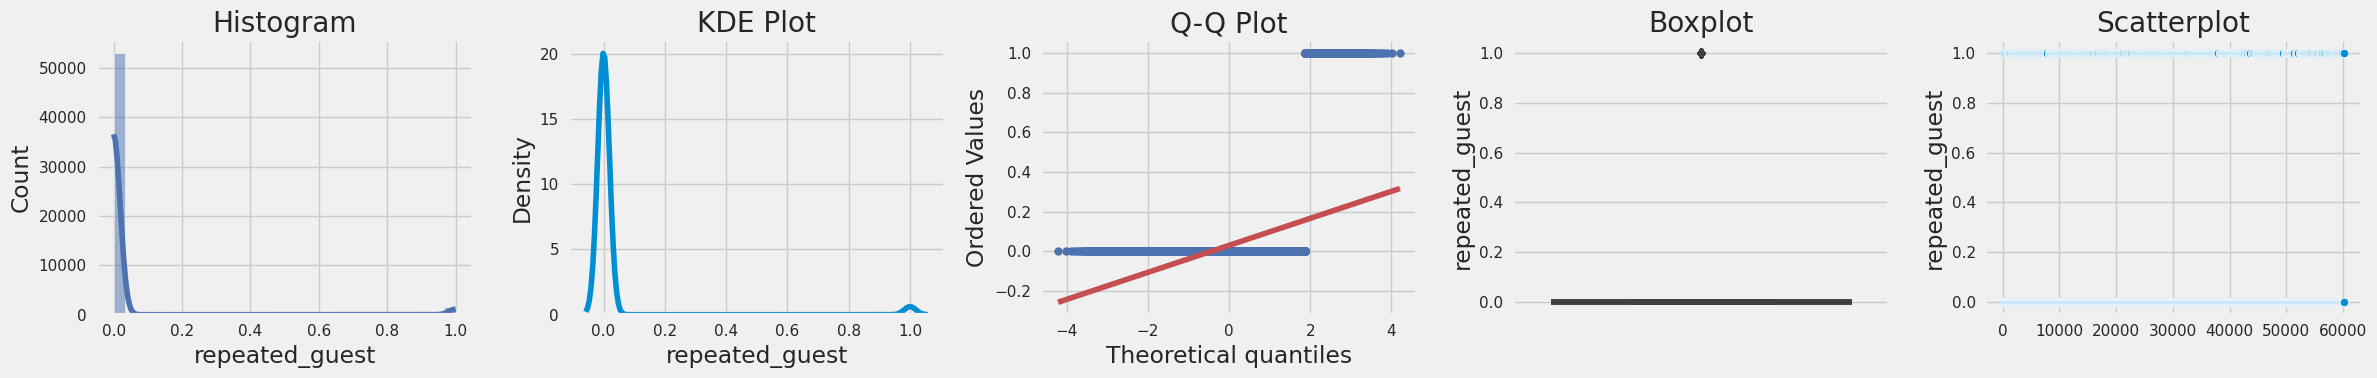

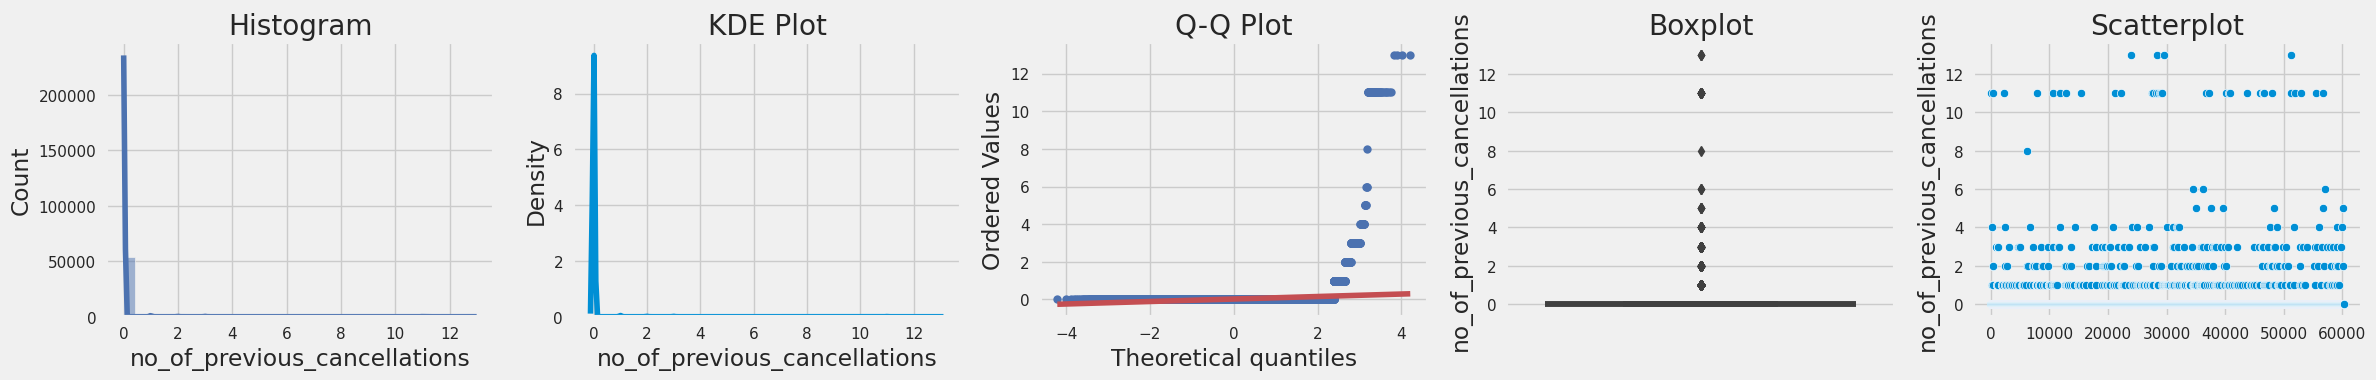

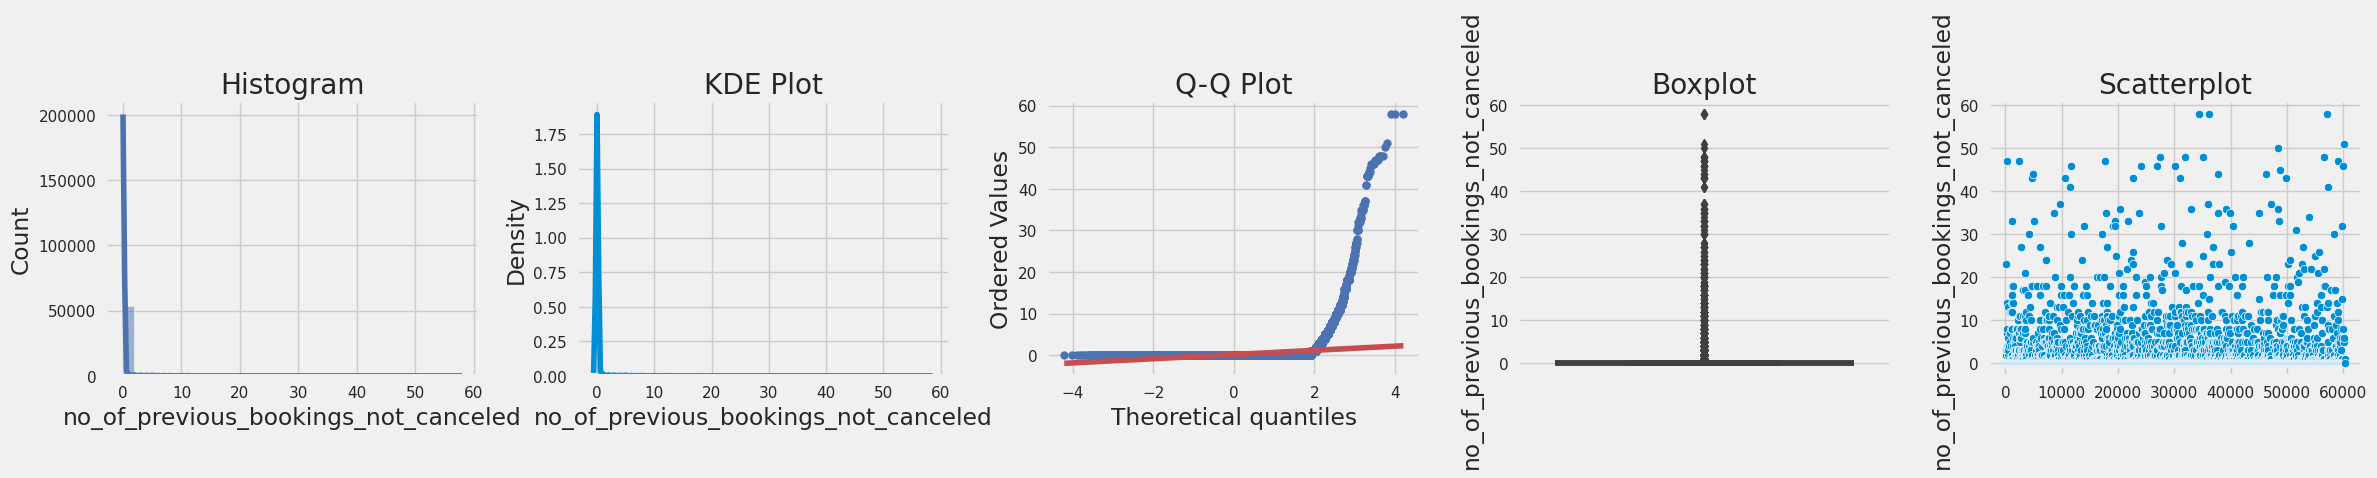

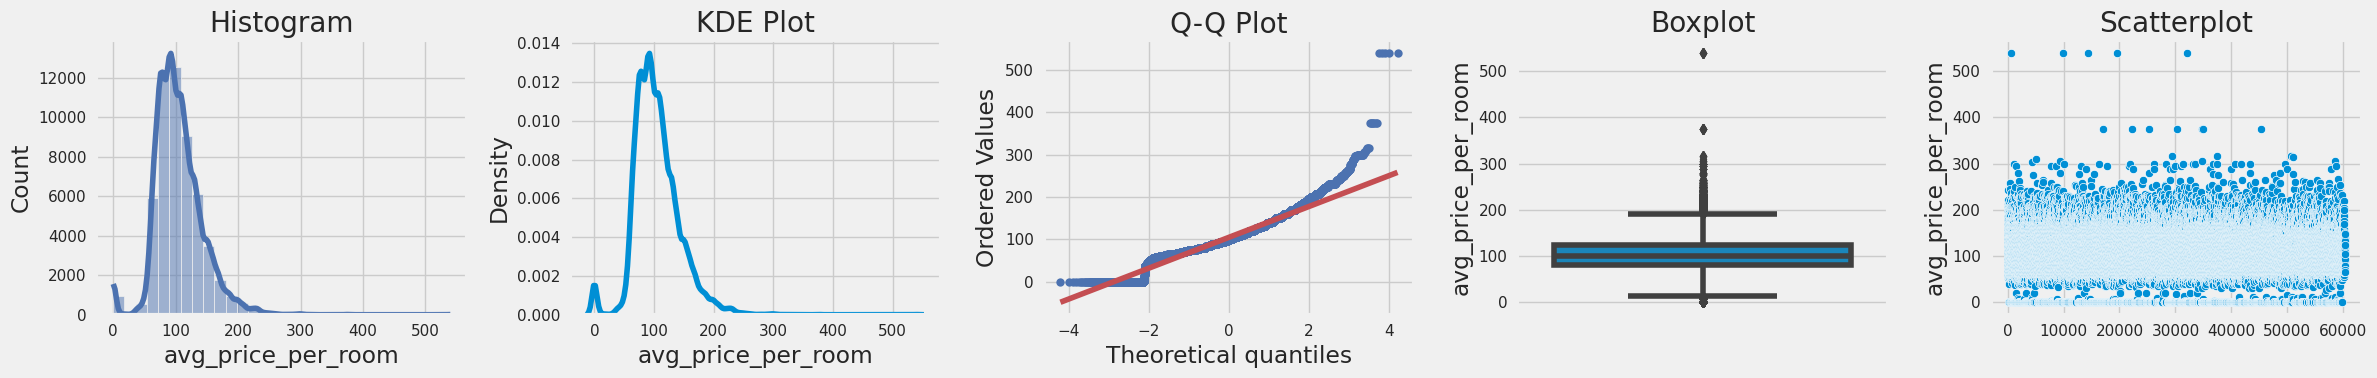

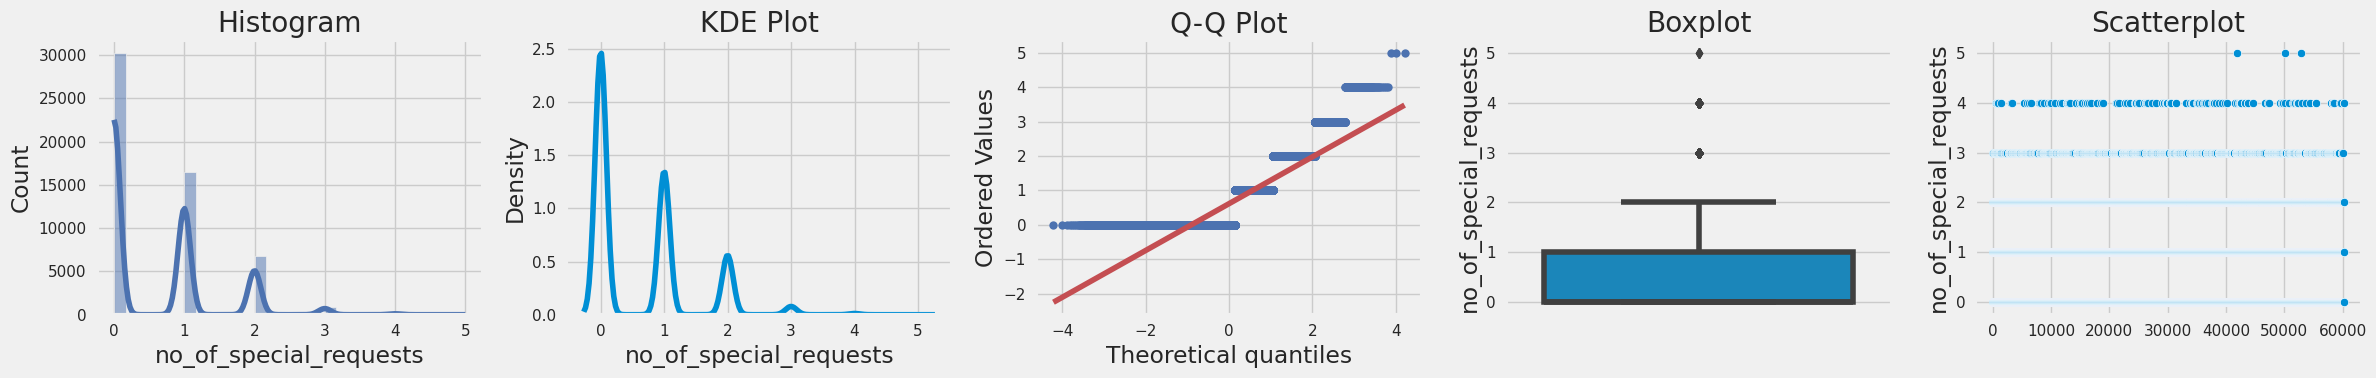

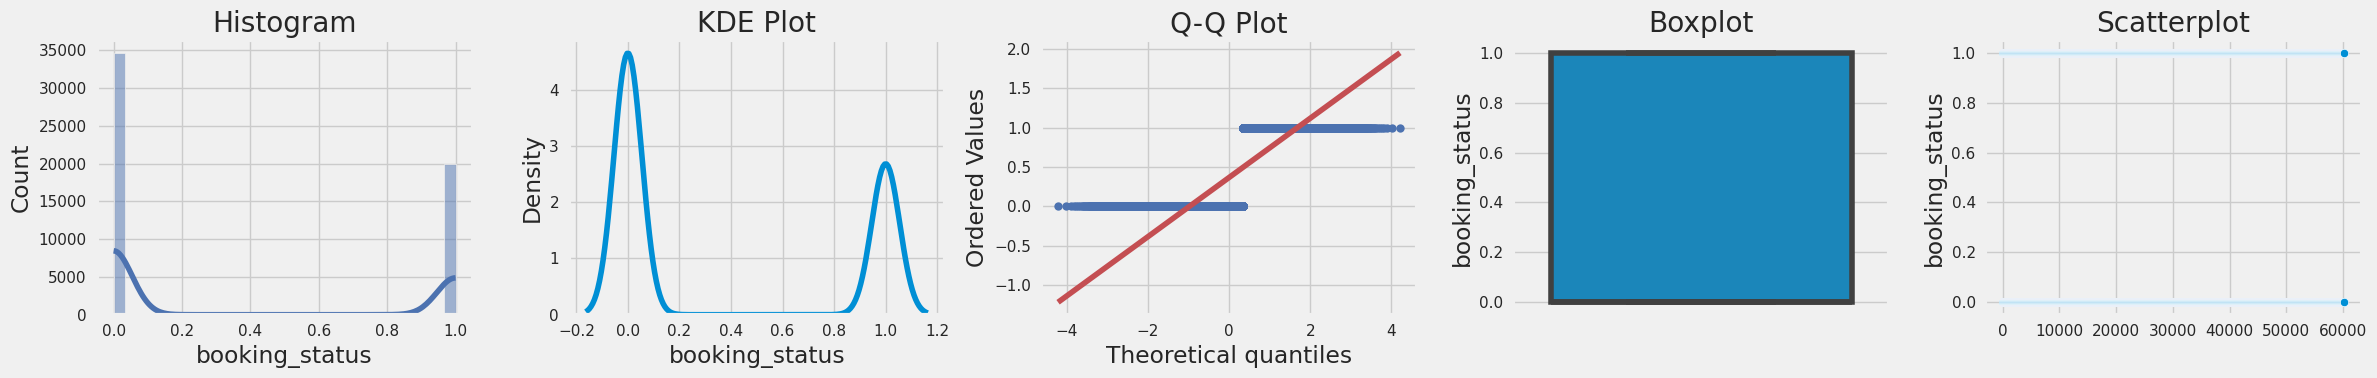

In [32]:
%matplotlib inline
def plots(df, variable):
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0])
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1])
    ax[1].set_title('KDE Plot')
    
    # Q-Q plots
    stats.probplot(df[variable], dist="norm", plot=ax[2])
    ax[2].set_title('Q-Q Plot')
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3])
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4])
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in train.columns:
    plots(train ,i)

In [33]:
#FUNCTION TO DETECT OUTLIERS
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage')


detect_outliers(train)

,Outlier_percentage
booking_status,0.000000
arrival_month,0.000000
arrival_date,0.000000
no_of_weekend_nights,0.056805
no_of_previous_cancellations,0.848405
no_of_week_nights,1.049970
lead_time,1.062797
market_segment_type,1.370641
no_of_special_requests,2.002822
no_of_previous_bookings_not_canceled,2.739450


In [34]:
def outlier_removal(data , i):
    q1 = np.quantile(data[i] ,0.25)
    q3 = np.quantile(data[i] , 0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    data.drop(data[data[i]> upper_tail].index , inplace = True)
    data.drop(data[data[i]< lower_tail].index ,inplace =True)
    
outlier_list = ['avg_price_per_room']
for  i in outlier_list:
    outlier_removal(train ,i)

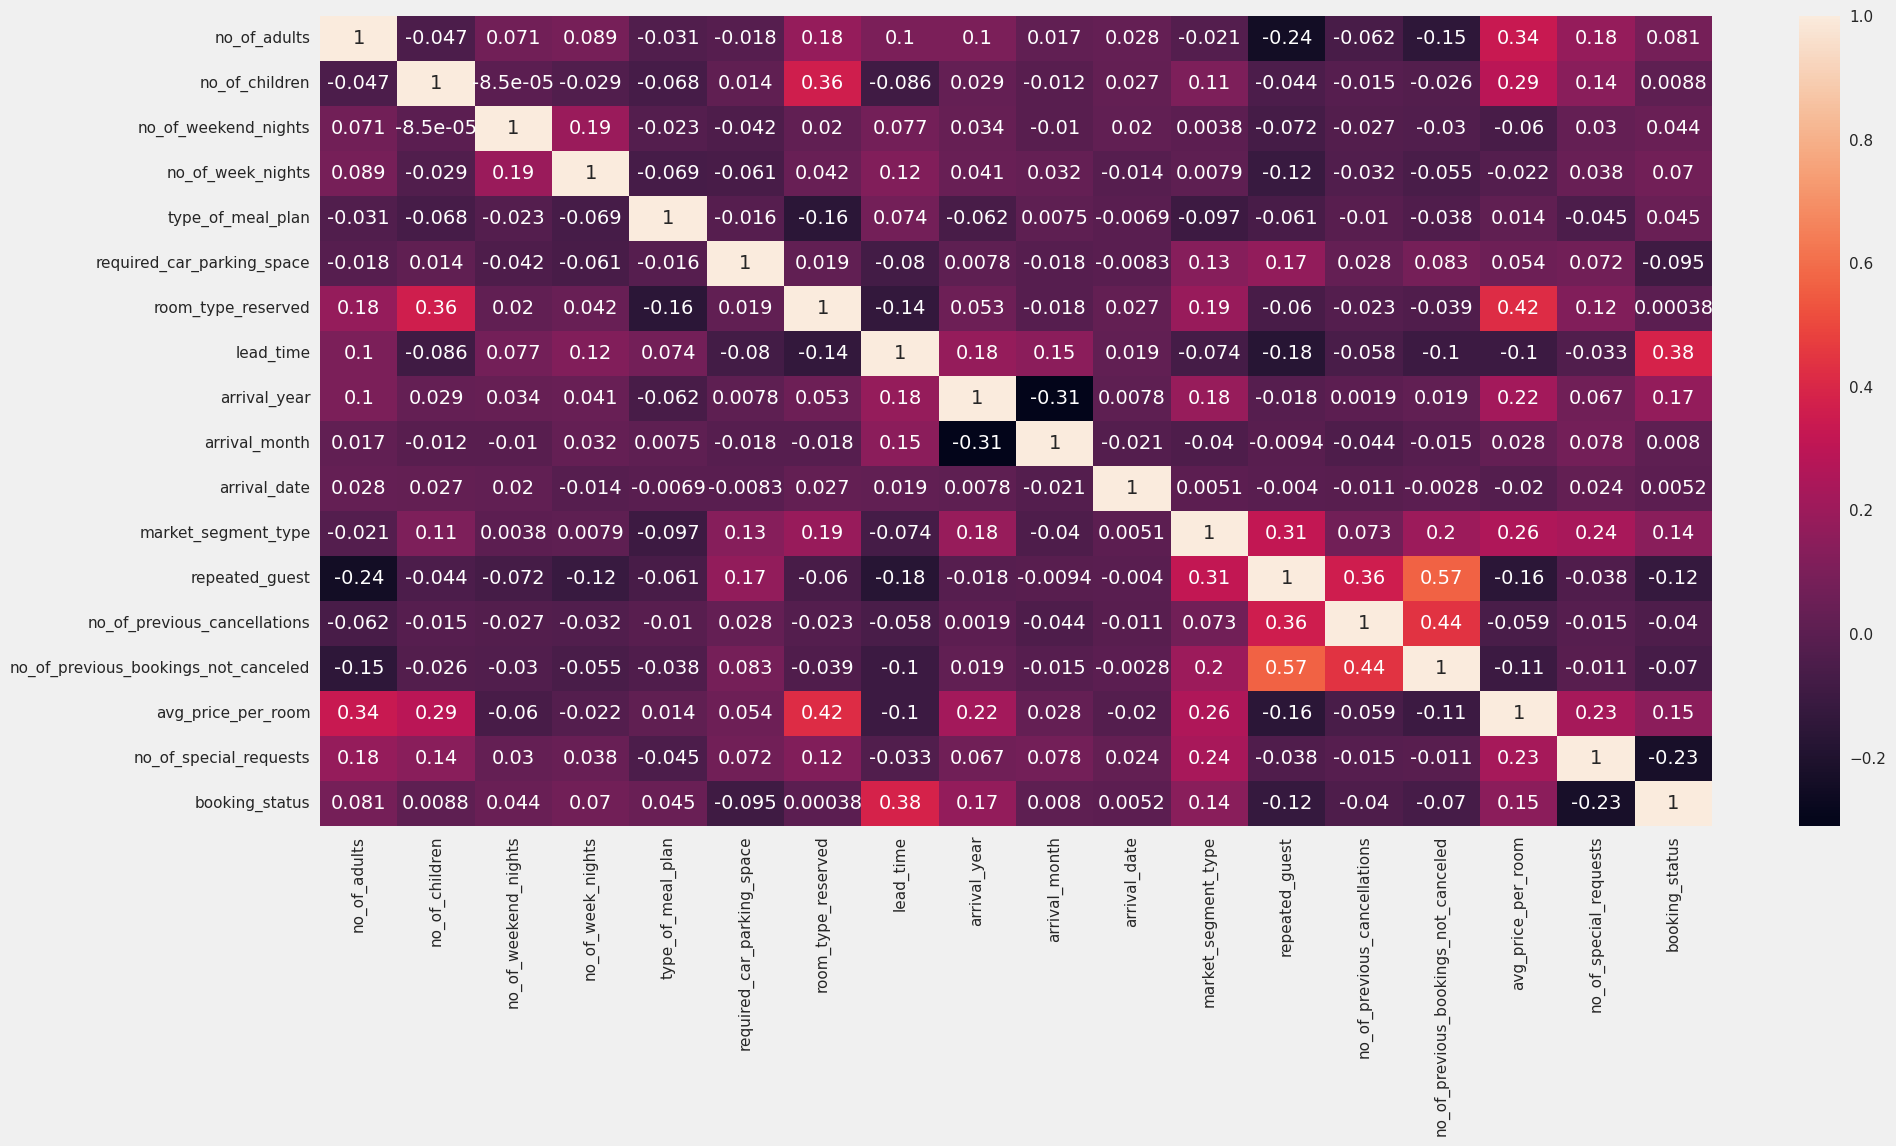

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True);

## Feature Engineering

In [36]:
train  = train.drop("no_of_previous_bookings_not_canceled", axis=1)
test  = test.drop("no_of_previous_bookings_not_canceled", axis=1)

In [ ]:
X = train.drop('booking_status', axis=1)
y= train.booking_status

In [ ]:
# X.columns

In [ ]:
numerical = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests']
categorical = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'market_segment_type', 'repeated_guest']

## PyCaret

In [47]:
from pycaret.classification import *

In [49]:
classification.setup(X,target=y ,session_id=42, categorical_features = categorical, numeric_features = numerical)

,Description,Value
0,Session id,42
1,Target,booking_status
2,Target type,Binary
3,Original data shape,"(52303, 17)"
4,Transformed data shape,"(52303, 17)"
5,Transformed train set shape,"(36612, 17)"
6,Transformed test set shape,"(15691, 17)"
7,Ordinal features,3
8,Numeric features,10
9,Categorical features,6


In [50]:
classification.compare_models(verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8246,0.8958,0.7388,0.7769,0.7573,0.6202,0.6207,0.1090
lightgbm,Light Gradient Boosting Machine,0.8226,0.8940,0.7299,0.7776,0.7530,0.6148,0.6155,0.2410
gbc,Gradient Boosting Classifier,0.8109,0.8801,0.6834,0.7791,0.7281,0.5841,0.5871,0.1520
rf,Random Forest Classifier,0.8089,0.8751,0.7102,0.7587,0.7336,0.5849,0.5857,0.3180
et,Extra Trees Classifier,0.7970,0.8424,0.6962,0.7405,0.7176,0.5595,0.5601,0.6930
ada,Ada Boost Classifier,0.7941,0.8664,0.6913,0.7367,0.7132,0.5528,0.5536,0.1860
lr,Logistic Regression,0.7709,0.8337,0.6348,0.7149,0.6724,0.4972,0.4994,0.6390
lda,Linear Discriminant Analysis,0.7692,0.8329,0.6331,0.7120,0.6702,0.4936,0.4957,0.0630
ridge,Ridge Classifier,0.7691,0.0000,0.6265,0.7151,0.6678,0.4921,0.4947,0.0560
dt,Decision Tree Classifier,0.7449,0.7315,0.6520,0.6570,0.6545,0.4523,0.4523,0.0610


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

## Pipeline

In [63]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from tempfile import mkdtemp
from shutil import rmtree
cachedir = mkdtemp()
allow_grid_searching = True

In [58]:
preproc_numerical = make_pipeline(
    MinMaxScaler())

preproc_categorical = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"))

preproc = make_column_transformer(
    (preproc_numerical, numerical),
    (preproc_categorical, categorical),
    remainder="drop")

preproc

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('pipeline-1',
                                 Pipeline(memory=None,
                                          steps=[('minmaxscaler',
                                                  MinMaxScaler(clip=False,
                                                               copy=True,
                                                               feature_range=(0,
                                                                              1)))],
                                          verbose=False),
                                 ['no_of_adults', 'no_of_children',
                                  'no_of_weekend_nights', 'no_of_week_nights',
                                  'lead_time', 'arrival_month', 'arrival_...
                                          steps=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                max_categories=None,
                                                                min_frequency=None,
                                                                sparse=True))],
                                          verbose=False),
                                 ['type_of_meal_plan',
                                  'required_car_parking_space',
                                  'room_type_reserved', 'arrival_year',
                                  'market_segment_type', 'repeated_guest'])],
                  verbose=False, verbose_feature_names_out=True)

### XGBoost Classifier

In [71]:
model_xgb = XGBClassifier(max_depth=8, n_estimators=200, learning_rate=0.1)
pipe_xgb = make_pipeline(preproc, model_xgb)
cross_val_score(pipe_xgb,X,y,cv=5,scoring="f1",n_jobs=-1).mean()

0.7572803299468911

In [70]:
# pipe_xgb.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('pipeline-1',
                                    Pipeline(memory=None,
                                             steps=[('minmaxscaler',
                                                     MinMaxScaler(clip=False,
                                                                  copy=True,
                                                                  feature_range=(0,
                                                                                 1)))],
                                             verbose=False),
                                    ['no_of_adults', 'no_of_children',
                                     'no_of_weekend_nights', 'no_of_week_nights',
                                     'lead_time', 'arrival_month', 'arrival_...
                               

In [68]:
# if allow_grid_searching:
#     grid = {
#          'xgbclassifier__learning_rate': [0.1, 0.5, 1],
#          'xgbclassifier__max_depth': [8, 10, 12],
#          'xgbclassifier__n_estimators': [200, 400, 600]
#     }

#     search_xgb = GridSearchCV(pipe_xgb, param_grid=grid, 
#                               cv=5, n_jobs=-1, verbose=2, scoring='f1')

#     search_xgb.fit(X, y);
#     print(search_xgb.best_params_)
#     search_xgb.best_score_ 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=200; total time=  30.6s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=200; total time=  31.1s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=200; total time=  38.0s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=200; total time=  38.3s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=200; total time=  38.7s
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=400; total time= 1.1min
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbclassifier__n_estimators=400; total time= 1.1min
[CV] END xgbclassifier__learning_rate=0.1, xgbclassifier__max_depth=8, xgbcla

In [78]:
from sklearn.inspection import permutation_importance

# Fit model
model = pipe_xgb.fit(X,y) 

# Performs Permutation
permutation_score = permutation_importance(model, X, y, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False)

,feature,score decrease
7,lead_time,0.148492
15,no_of_special_requests,0.120479
14,avg_price_per_room,0.079844
11,market_segment_type,0.076294
9,arrival_month,0.031166
10,arrival_date,0.017425
3,no_of_week_nights,0.012181
0,no_of_adults,0.007202
2,no_of_weekend_nights,0.007168
6,room_type_reserved,0.006833


In [72]:
X_test_ids = test['id']
X_test = test.drop(columns=['id'])

In [73]:
pipe_xgb.fit(X,y)
y_pred= pipe_xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [76]:
results = pd.concat([X_test_ids, pd.Series(y_pred, name="booking_status")], axis=1)
results.head(1)

,id,booking_status
0,42100,0


In [77]:
results.to_csv("data/submission.csv", header=True, index=False)